In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
df = pd.read_csv('homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


In [3]:
# get actions from control group
control_df = df.query('group == "control"')

# compute click through rate
control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()

# view click through rate
control_ctr

0.2797118847539016

In [4]:
# get actions from experiment group
experiment_df = df.query('group == "experiment"')

# compute click through rate
experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()

# view click through rate
experiment_ctr

0.3097463284379172

In [5]:
# compute observed difference in click through raet
obs_diff = experiment_ctr - control_ctr
obs_diff

0.030034443684015644

In [6]:
# simulate sampling distribution for difference in proportions, or CTRs
diffs = []
for _ in range(10000):
    b_samp = df.sample(df.shape[0], replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()
    experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
    diffs.append(experiment_ctr - control_ctr)

In [7]:
# convert to numpy
diffs = np.array(diffs)

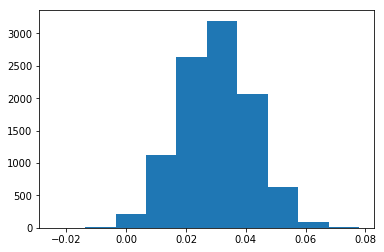

In [8]:
# plot sampling distribution
plt.hist(diffs);

In [9]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

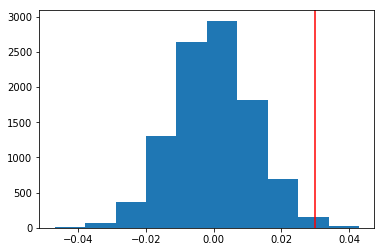

In [10]:
# plot null distribution and line at our observed differece
plt.hist(null_vals)
plt.axvline(x=obs_diff, color='red');

In [11]:
# compute p-value
(null_vals > obs_diff).mean()

0.0053